# Tarea 1

** Data Science 1 **

Fecha de entrega: Viernes 12 de Octubre, 2018

¿Cómo?:  archivo NombreApellido_tarea1.zip enviado por email a guillecabrera@inf.udec.cl con copia a cridonoso@inf.udec.cl

#### IMPORTANTE:
- Las tareas deben estar en nuestros correos **antes de la medianoche**, por lo que recomiendo enviarlas con anticipación.
- Si llega despues de las 12 de la noche, utilizan uno de sus 4 días totales permitidos para atraso . Si no les quedan días de atraso y la tarea llega atrasada tienen un <span style="color:red">**1.0**</span>.
- Está bien discutir las respuestas con compañeros. Está bien buscar la respuesta en google. Está bien asistir a clases donde revisaremos (y a veces programaremos) las respuestas. **No está bien entregar código escrito por otras personas** ya sea compañeros, código obtenido por internet o incluso el código que el profesor programa en clases. **Todo el código entregado debe ser escrito completamente por ustedes**.


## Pregunta 1: Web Scraping

In [97]:
import requests # to obtain html data
import bs4      # beautifulsoup4 to parse the html content
import re
import pandas as pd

## Pregunta 1.1 (1.5 puntos)

Se necesita extraer información y realizar consultas sobre **datos asociados al cuerpo docente de la Facultad de Ingeniería**. Desafortunadmente, no se tiene acceso a la base de datos. Pese a ello, con los conocimientos aprendidos en clases de Data Science I, usted es capaz de **extraer información pública desde paginas web**.<br>En esta tarea deberá aplicar tecnicas de web scraping y expresiones regulares. En particular:

- Leer el conjunto de paginas que se entrega a continuacion (ver el array ```pages```) utilizando el método ```requests.get()```
- Utilizando **Beautifulsoup**  y **Regex** parsear el html y extraer:
    - Nombre
    - Apellido Paterno
    - Apellido Materno
    - Grado Academico
    - Cargo
    - Oficina
    - Horario de Consulta
    - Contacto
    - Correo
    - Carrera a la que pertenece
    

In [173]:
pages = ['http://www.ing.udec.cl/Departamento/ingenieria-civil/docentes', 
         'http://www.ing.udec.cl/Departamento/ingenieria-electrica/docentes',
         'http://www.ing.udec.cl/Carrera/ingenieria-civil-en-telecomunicaciones/docentes',
         'http://www.ing.udec.cl/Carrera/ingenieria-civil-biomedica/docentes',
         'http://www.ing.udec.cl/Departamento/ingenieria-industrial/docentes',
         'http://www.ing.udec.cl/Departamento/ingenieria-informatica-y-cs-de-la-computacion/docentes',
         'http://www.ing.udec.cl/Departamento/ingenieria-de-materiales/docentes',
         'http://www.ing.udec.cl/Carrera/ingenieria-mecanica/docentes',
         'http://www.ing.udec.cl/Carrera/ingenieria-metalurgica/docentes',
         'http://www.ing.udec.cl/Departamento/ingenieria-quimica-/docentes'
        ]

In [174]:
results = []
for page in pages:
    results.append(bs4.BeautifulSoup(requests.get(page).text,'lxml'))

In [221]:
ldptos = []
for res in results:
    for ld in res.select('.list-departamentos'):
        ldptos.append(ld)

docentes=[]
docentespordepto=[]
for ldpto in ldptos:
    ndoc=0
    for doc in ldpto.select('.caja-texto'):
        ndoc+=1
        docentes.append(doc)
    docentespordepto.append(ndoc)
        
deptos=['Ingeniería Civil','Ingeniería Eléctrica','Ingeniería Industrial', 'Ingeniería Informática',\
       'Ingeniería de Materiales', 'Ingeniería Química']
departamentos=[]

i=0
for depto in deptos:
    for _ in range(docentespordepto[i]):
        departamentos.append(depto)
    i+=1

#Obteniendo y separando los nombres
nombres = []
a_paternos = []
a_maternos = []
for docente in docentes:
    nombre = docente.find('h3').text
    nombre = re.split('\W+',nombre)
    n2=[]
    for n in nombre:
        if n != '':
            n2.append(n)
    nombre=n2
    if len(nombre)==5:
        nombres.append(nombre[0])
        a_paternos.append(nombre[1]+nombre[2]+nombre[3])
        a_maternos.append(nombre[4])
    elif len(nombre)==4:
        if nombre[2]=='del':
            nombres.append(nombre[0])
            a_paternos.append(nombre[1])
            a_maternos.append(nombre[2]+nombre[3])
        else:
            nombres.append(nombre[0]+nombre[1])
            a_paternos.append(nombre[2])
            a_maternos.append(nombre[3])
    elif len(nombre)==3:
        nombres.append(nombre[0])
        a_paternos.append(nombre[1])
        a_maternos.append(nombre[2])
    elif len(nombre)==2:
        nombres.append(nombre[0])
        a_paternos.append(nombre[1])
        a_maternos.append('')

#Obteniendo el resto del texto
textos = []
for docente in docentes:
    texto = '' 
    for t in docente.find_all('p'):
            texto+=t.text
    textos.append(texto)

grados=[]
cargos=[]
oficinas=[]
horarios=[]
contactos=[]
correos=[]
for texto in textos:
    #Obteniendo grados
    grado_pattern1=re.compile('PhD(.*)|Ph.D(.*)')
    grado_pattern=re.compile('MS(.*)')
    m=grado_pattern1.search(texto)
    n=grado_pattern.search(texto)
    if m and not n:
        grados.append(m.group())
    elif n and not m:
        grados.append(n.group())
    elif n and m:
        grados.append(n.group()+' '+m.group())
    else:
        grados.append('')

    #Obteniendo cargos
    cargo_pattern=re.compile('Cargo:(.*)')
    m=cargo_pattern.search(texto).group()
    csplit=re.split('\W+',m)
    cargo=csplit[1]
    for word in csplit[2:]:
        if word!='':
            cargo+=' '+word
    #if cargo=='Profesor asistente' or cargo=='Profesora Asistente':
    #    cargo='Profesor Asistente'
    #elif cargo=='Profesor titular':
    #    cargo='Profesor Titular'
    #elif cargo=='Profesor asociado':
    #    cargo='Profesor Asociado'
    cargos.append(cargo)

    #Obteniendo la oficina
    of_pattern=re.compile('Oficina:(.*)')
    m=of_pattern.search(texto)
    if m:
        ofsplit=re.split('\W+',m.group())
        ofws=''
        for w in ofsplit:
            if w!='Oficina' and w!='':
                ofws=w
                fword=w
                break
        for w in ofsplit[1:]:
            if w!='Oficina' and w!='' and w!=fword:
                ofws+=' '+w
        oficinas.append(ofws)
    else:
        oficinas.append('')

    #Obteniendo horarios
    hor_pattern=re.compile('Horario(.*)')
    m=hor_pattern.search(texto).group()
    hor_split=re.split(':(.*)',m)
    word=hor_split[1].replace('\xa0','')
    word=word.replace('\r','')
    horarios.append(word)

    #Obteniendo contacto
    cont_pattern=re.compile('Contacto(.*)')
    m=cont_pattern.search(texto)
    if m:
        contsplit=re.split(':(.*)',m.group())
        word=contsplit[1].replace('\xa0','')
        contactos.append(word)
    else:
        contactos.append('')
        
    #Obteniendo correo
    cor_pattern=re.compile('Correo(.*)')
    m=cor_pattern.search(texto)
    if m:
        corsplit=re.split(':(.*)',m.group())
        word=corsplit[1].replace('\xa0','')
        correos.append(word)
    else:
        correos.append('')

In [222]:
table={'Nombre':nombres,'Apellido Paterno':a_paternos,'Apellido Materno':a_maternos,'Grado':grados\
       ,'Cargo':cargos,'Oficina':oficinas,'Horario':horarios,'Contacto':contactos, 'Correo':correos, \
       'Departamento':departamentos}
df= pd.DataFrame.from_dict(table)
df.head()

,Nombre,Apellido Paterno,Apellido Materno,Grado,Cargo,Oficina,Horario,Contacto,Correo,Departamento
0,Patricio,Cendoya,Hernández,PhD. Ingeniería de Caminos de la Universitat P...,Profesor Asociado,,,41 2 204320,pcendoya@udec.cl,Ingeniería Civil
1,Alejandro,Tudela,Roman,PhD. Ingeniería de Transportes de la Universit...,Docente,,Sin horario definido,41-2203601,atudela@udec.cl,Ingeniería Civil
2,Alex,Otto,Schwarz,PhD. Ingeniería Civil y Ambiental de la Northe...,Docente,,Sin horario definido,41-2201122,alexschwarz@udec.cl,Ingeniería Civil
3,César,León,González,,Director Rector Instituto de Investigaciones,Edmundo Larenas N 270 interior,,41 2 204320,cleon@udec.cl,Ingeniería Civil
4,Daniella,Escribano,Leiva,PhD. Ingeniería de la Universty of Bristol,Profesora Asistente,435,Sin horario definido,736241-2207362,Describano@udec.cl,Ingeniería Civil


In [223]:
##Homogeneizando los cargos y creando df con todos los cargos de una persona
pasoc_pattern=re.compile('Profesor (A|a)sociado')
pasis_pattern=re.compile('(P|p)rofesor (A|a)sistente')
ptit_pattern=re.compile('(P|p)rofesor (T|t)itular')
jc_pattern=re.compile('(J|j)ef(e|a) de (C|c)arrera')
dir_pattern=re.compile('(Director ((?!de)(\w*)){1})|Director de (\w+)')
jefe_pattern=re.compile('Jefe de Laboratorio')
doc_pattern=re.compile('(D|d)ocente')
nom=[]
depto=[]
cargos=[]
for row in df.itertuples():
    added=0
    cargo=row[5]
    m=pasoc_pattern.search(cargo)
    if m:
        cargos.append('Profesor Asociado')
        depto.append(row[10])
        nom.append(row[1])
        added=1
    m=pasis_pattern.search(cargo)
    if m:
        cargos.append('Profesor Asistente')
        depto.append(row[10])
        nom.append(row[1])
        added=1
    m=ptit_pattern.search(cargo)
    if m:
        cargos.append('Profesor Titular')
        depto.append(row[10])
        nom.append(row[1])
        added=1
    m=jc_pattern.search(cargo)
    if m:
        cargos.append('Jefe de Carrera')
        depto.append(row[10])
        nom.append(row[1])
        added=1
    m=jefe_pattern.search(cargo)
    if m:
        cargos.append(m.group())
        depto.append(row[10])
        nom.append(row[1])
        added=1
    m=dir_pattern.search(cargo)
    if m:
        cargos.append(m.group())
        depto.append(row[10])
        nom.append(row[1])
        added=1
    m=doc_pattern.search(cargo)
    if m:
        cargos.append('Docente')
        depto.append(row[10])
        nom.append(row[1])
        added=1
    if not added:
        cargos.append('No aparece')
        depto.append(row[10])
        nom.append(row[1])
df2=pd.DataFrame.from_dict({'Nombre':nom,'Cargo':cargos,'Departamento':depto})


## Pregunta 1.2 (1 punto)

Calcule el número de profesores de cada cargo por departamento.  

In [224]:
df2=df2.groupby(['Cargo','Departamento']).count()
df2=df2.pivot_table('Nombre',['Cargo'],'Departamento',fill_value=0)
df2

Departamento,Ingeniería Civil,Ingeniería Eléctrica,Ingeniería Industrial,Ingeniería Informática,Ingeniería Química,Ingeniería de Materiales
Cargo,,,,,,
Director Departamento,0,1,1,0,0,0
Director Doctorado,0,0,0,0,0,1
Director Rector,1,0,0,0,0,0
Director de Departamento,0,0,0,0,0,1
Director de Postgrado,0,1,0,0,0,0
Docente,7,1,11,15,0,3
Jefe de Carrera,0,4,1,1,0,1
Jefe de Laboratorio,1,0,0,0,0,0
No aparece,1,0,0,0,0,0


## Pregunta 1.3 (1 punto)

Calcule el porcentaje de academicos de cada departamento que realizaron sus estudios de postgrado en la UdeC.

In [237]:
for depto in df.Departamento.unique():
    nudec=df[df.Departamento==depto][df.Grado.str.contains(r'Universidad de Concepción')].shape[0]
    ndepto=df[df.Departamento==depto].shape[0]
    print(depto,': ',"{:.2f}".format(100*nudec/float(ndepto)),'%')

Ingeniería Civil :  5.56 %
Ingeniería Eléctrica :  44.44 %
Ingeniería Industrial :  25.00 %
Ingeniería Informática :  56.25 %
Ingeniería de Materiales :  77.78 %
Ingeniería Química :  22.73 %


/home/vicente/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


# Pregunta 2: estimación de densidad no-paramétrica

## Pregunta 2.1 (1.5 punto)

Modele la distrubución de probabilidad de los siguientes datos utilizando un método de Kernel Density Estimation (KDE) y Gaussian Mixture Model (GMM). Utilice algún criterio para ajustar los hiperparámetros de cada modelo. Explique claramente la metodología utilizada. Puede utilizar librerias de python usadas en clases.

(300, 2) (100, 2)
(300, 2) (100, 2)
(300, 2) (100, 2)


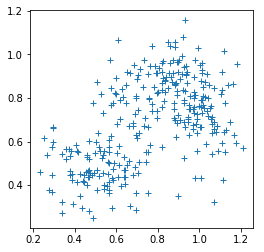

In [3]:
import numpy as np
from scipy.stats import multivariate_normal
import pylab as pl

mu = np.array([[0.5, 0.5],
              [0.75, 0.8],
              [1, 0.75]])
S = np.array([[[0.02, 0],
             [0, 0.01]],
             [[0.02, 0.01],
             [0.01, 0.02]],
             [[0.01, 0],
             [0, 0.02]]])

K = mu.shape[0]
mvn = []
N = 100
x = np.zeros([K*N, 2])
for i in range(mu.shape[0]):
    mvn.append(multivariate_normal(mean=mu[i], cov=S[i]))
    print (x.shape, mvn[i].rvs(N).shape)
    x[i*N: (i+1)*N] = mvn[i].rvs(N)
bins = 100
grid_x1 = np.linspace(0, 1.5, bins)
grid_x2 = np.linspace(0, 1.5, bins)
x1_v, x2_v = np.meshgrid(grid_x1, grid_x2)

#pl.clf()
pl.figure(figsize =(4,4))
pl.plot (x[:, 0], x[:, 1], "+")
pl.show()

## Pregunta 2.2 (1 punto)

¿Cuál de sus dos modelos se ajusta mejor a los datos y por qué?